# Results

In [1]:
# import packages and set working directory
import numpy as np
import matplotlib.pyplot as plt
import os
from math import exp
import pandas as pd

# import objects
from farm import Climate
from farm import Soil
from farm import Crop
from farm import CropModel

In [2]:
climate = Climate() 
soil = Soil('loam')
crop = Crop(soil=soil)
soil.set_nZr(crop)  
model = CropModel(crop=crop,soil=soil,climate=climate)

model.run()
model.output()

,kc,LAI,stress,R,s,E,ET,T,L,dsdt,doy,PD
0,0.3,0.75,1.000000,18.594281,0.300000,0.099097,0.099097,0.000000,0.000000,18.495184,1,100
1,0.3,0.75,0.692554,0.000000,0.382019,0.360869,0.562232,0.201362,0.000000,-0.562232,2,100
2,0.3,0.75,0.706005,0.000000,0.379525,0.351408,0.543119,0.191711,0.000000,-0.543119,3,100
3,0.3,0.75,0.719122,0.000000,0.377117,0.342349,0.524736,0.182388,0.000000,-0.524736,4,100
4,0.3,0.75,0.731909,0.000000,0.374790,0.333671,0.507050,0.173380,0.000000,-0.507050,5,100
5,0.3,0.75,0.744372,0.000000,0.372541,0.325356,0.490032,0.164676,0.000000,-0.490032,6,100
6,0.3,0.75,0.756518,3.952635,0.370368,0.317387,0.473651,0.156264,0.000000,3.478983,7,100
7,0.3,0.75,0.672421,0.000000,0.385796,0.375363,0.591347,0.215985,0.000000,-0.591347,8,100
8,0.3,0.75,0.686366,0.000000,0.383174,0.365281,0.571114,0.205833,0.000000,-0.571114,9,100
9,0.3,0.75,0.699970,0.000000,0.380641,0.355632,0.551661,0.196030,0.000000,-0.551661,10,100


In [15]:
# Bare soil evaporation
climate = Climate() 
soil = Soil('loam')
crop = Crop(soil=soil, T_max=0)
soil.set_nZr(crop)  
model = CropModel(crop=crop,soil=soil,climate=climate)

model.run()
#model.output()

## Finding the initial conditions

Why are we doing this? The goal of this is to: X, Y, and Z.

These are the notes on what to do based on 19 February meeting with Kelly and Bryn

   * **Step 1.** Start DOY before the planting season. Pick a day when there isn’t much rain: July 1. Or pick some other day that’s verified it doesn’t rain much. 
   * **Step 2.** Run t_sim for 365 so the calendar ends on June 30. 
   * **Step 3.** Start planting date on Oct. 1
   * **Step 4.** Then take the soil moisture of June 30.
   * **Step 5.** Re-run the simulation where the soil moisture on July 1st is the value that ended on June 30. 
   * **Step 6.** Run this lots and lots of times. 
   * **Step 7.** Remove the first year of data because that was an artificial soil moisture value. 
   * **Step 8.** End goal: For a given day of the year, return the mean and variance of the soil moisture for that/each day. Plot the results.

In [13]:
# Finding out the initial conditions
# This code is based on a crop that has a lgp of 180 days (pre-set in the code)

# Step 1.  Start DOY before the planting season. 
# Pick a day when there isn’t much rain: July 1, Julian Day 182 in non-leap year.

# Step 2. Run t_sim for 365 so that calendar ends on June 30.
new_climate = {
    'alpha_r': [10.0] * 12,
    'lambda_r': [0.25] * 12,
    'doy_start': 182,
    't_sim': 365,
    'ET_max': 6.5
} 
climate = Climate(climate_parameters=new_climate) 
soil = Soil('loam')
crop = Crop(soil=soil)
soil.set_nZr(crop)  

# Step 3. Start planting date on some reasonable planting date
# Picked October 1. Julian Day 274 in regular year. 
model = CropModel(crop=crop,soil=soil,climate=climate, planting_date=274)
model.run()
fin = model.output()
fin

# Step 4. Take the soil moisture of June 30 and 
# Re-run the simulation where the soil moisture on July 1st is the value that ended on June 30. 
print(fin.s.tail(1)) # The argument in tail is the last n lines
last_s = fin.s.tail(1)

# Step 5. Re-run the simulation where the soil moisture on July 1st is the value that ended on June 30. 
# To do this we want to set s0 in model.run as last_s
model.run(s0=last_s)
fin = model.output()
fin

364    0.517626
Name: s, dtype: float64


,kc,LAI,stress,R,s,E,ET,T,L,dsdt,doy,PD
0,0.3,0.75,0.155831,0.000000,0.517626,0.986332,1.712626,0.726295,0.0,-1.712626,182,274
1,0.3,0.75,0.175774,9.302231,0.510031,0.946136,1.643032,0.696895,0.0,7.659199,183,274
2,0.3,0.75,0.095907,0.942280,0.543997,1.130149,1.958524,0.828374,0.0,-1.016243,184,274
3,0.3,0.75,0.105122,12.370167,0.539490,1.105112,1.916041,0.810929,0.0,10.454126,185,274
4,0.3,0.75,0.030512,0.000000,0.585850,1.371399,2.361786,0.990386,0.0,-2.361786,186,274
5,0.3,0.75,0.043457,6.008678,0.575376,1.309577,2.259421,0.949844,0.0,3.749258,187,274
6,0.3,0.75,0.023972,0.000000,0.592003,1.408158,2.422362,1.014204,0.0,-2.422362,188,274
7,0.3,0.75,0.035904,0.000000,0.581261,1.344193,2.316814,0.972621,0.0,-2.316814,189,274
8,0.3,0.75,0.049562,0.000000,0.570986,1.283949,2.216800,0.932851,0.0,-2.216800,190,274
9,0.3,0.75,0.064687,0.000000,0.561156,1.227174,2.121971,0.894797,0.0,-2.121971,191,274


In [47]:
# Step 6. Run this lots and lots of times and return a matrix where the
# row is each simulation and the column is doy

def initial_conditions(simulations):
    
    # generate little progress bar
    import time
    import progressbar
    
    for i in progressbar.progressbar(range(simulations)):
        time.sleep(0.02)
    
    df = pd.DataFrame()
    #result = []
    
    # run this many times
    for i in range(simulations):
        
        # Step 1.  Start DOY before the planting season. 
        # Pick a day when there isn’t much rain: July 1, Julian Day 182 in non-leap year.

        # Step 2. Run t_sim for 365 so that calendar ends on June 30.
        new_climate = {
            'alpha_r': [10.0] * 12,
            'lambda_r': [0.25] * 12,
            'doy_start': 182,
            't_sim': 365,
            'ET_max': 6.5
        } 
        climate = Climate(climate_parameters=new_climate) 
        soil = Soil('loam')
        crop = Crop(soil=soil)
        soil.set_nZr(crop)  

        # Step 3. Start planting date on some reasonable planting date
        # Picked October 1. Julian Day 274 in regular year. 
        model = CropModel(crop=crop,soil=soil,climate=climate, planting_date=274)
        model.run()
        fin = model.output()
        fin

        # Step 4. Take the soil moisture of June 30 and 
        # Re-run the simulation where the soil moisture on July 1st is the value that ended on June 30. 
        #print(fin.s.tail(1)) # The argument in tail is the last n lines
        last_s = fin.s.tail(1)

        # Step 5. Re-run the simulation where the soil moisture on July 1st is the value that ended on June 30. 
        # To do this we want to set s0 in model.run as last_s
        model.run(s0=last_s)
        fin = model.output()
        fin
        
        # Step 6. Run this lots and lots of times and return a matrix where the
        # row is each simulation and the column is doy
        
        # Return just the soil moisture in a dataframe and append the simulation
        # number to x
        df['x_' + str(i)] = model.s
        
    # Step 7. Remove the first year of data because that was an artificial soil moisture value. 
    # So drop the first column (this needs to be out of the loop)
    df = df.drop(['x_0'], axis=1)

    return df # could transpose so that simulation is row and DOY is column

result = initial_conditions(50)
result

100% (5000 of 5000) |####################| Elapsed Time: 0:01:53 Time:  0:01:53


,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_4990,x_4991,x_4992,x_4993,x_4994,x_4995,x_4996,x_4997,x_4998,x_4999
0,0.464919,0.476911,0.584352,0.590932,0.551683,0.486694,0.547126,0.632769,0.625690,0.528965,...,0.452995,0.656838,0.552610,0.690000,0.577157,0.622438,0.533164,0.426082,0.690000,0.554570
1,0.459413,0.470941,0.573944,0.580236,0.542674,0.663518,0.538310,0.620211,0.690000,0.530171,...,0.447944,0.643470,0.543563,0.688676,0.567060,0.610347,0.524930,0.422032,0.675652,0.545440
2,0.486708,0.465203,0.578903,0.570007,0.534044,0.649955,0.533401,0.608219,0.732587,0.604209,...,0.455456,0.630485,0.534896,0.674368,0.557398,0.598795,0.517036,0.418130,0.661733,0.536694
3,0.517791,0.459687,0.568731,0.560218,0.525774,0.636785,0.525158,0.596762,0.690000,0.592930,...,0.450312,0.632296,0.526590,0.690000,0.548148,0.587755,0.509465,0.457420,0.648222,0.528314
4,0.510189,0.454382,0.620015,0.550848,0.517845,0.624046,0.517254,0.585811,0.675652,0.582147,...,0.445363,0.627333,0.518628,0.675652,0.539288,0.577198,0.502202,0.452202,0.635102,0.520281
5,0.502897,0.449278,0.608032,0.630939,0.510242,0.611882,0.509675,0.614131,0.690000,0.571834,...,0.440600,0.615425,0.510992,0.661733,0.530800,0.567100,0.495232,0.563131,0.622438,0.559800
6,0.543637,0.444368,0.596584,0.618464,0.502947,0.623777,0.502403,0.602411,0.675652,0.561967,...,0.436015,0.603647,0.503667,0.648222,0.522664,0.557436,0.488540,0.553637,0.679275,0.550448
7,0.534967,0.485260,0.585640,0.606551,0.495946,0.611625,0.495424,0.591211,0.661733,0.552523,...,0.456231,0.592392,0.566708,0.665855,0.514863,0.548184,0.482113,0.544546,0.673293,0.541491
8,0.526658,0.486933,0.575176,0.595168,0.588210,0.600017,0.523799,0.580503,0.648222,0.543479,...,0.451058,0.581633,0.557061,0.652224,0.507381,0.539323,0.475940,0.535838,0.665187,0.589925
9,0.518693,0.480570,0.565165,0.584287,0.577634,0.588923,0.515952,0.620332,0.635102,0.534815,...,0.446080,0.571343,0.547825,0.638989,0.500202,0.545073,0.470008,0.527493,0.651576,0.579273


In [48]:
# Step 8. End goal: For a given day of the year, return the mean and 
# variance of the soil moisture for that/each day. Plot the results.

df = result
df['mean'] = df.mean(axis=1)
df['var'] = df.var(axis=1)
df

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_4992,x_4993,x_4994,x_4995,x_4996,x_4997,x_4998,x_4999,mean,var
0,0.464919,0.476911,0.584352,0.590932,0.551683,0.486694,0.547126,0.632769,0.625690,0.528965,...,0.552610,0.690000,0.577157,0.622438,0.533164,0.426082,0.690000,0.554570,0.570726,0.005209
1,0.459413,0.470941,0.573944,0.580236,0.542674,0.663518,0.538310,0.620211,0.690000,0.530171,...,0.543563,0.688676,0.567060,0.610347,0.524930,0.422032,0.675652,0.545440,0.570266,0.005161
2,0.486708,0.465203,0.578903,0.570007,0.534044,0.649955,0.533401,0.608219,0.732587,0.604209,...,0.534896,0.674368,0.557398,0.598795,0.517036,0.418130,0.661733,0.536694,0.570838,0.005250
3,0.517791,0.459687,0.568731,0.560218,0.525774,0.636785,0.525158,0.596762,0.690000,0.592930,...,0.526590,0.690000,0.548148,0.587755,0.509465,0.457420,0.648222,0.528314,0.571203,0.005191
4,0.510189,0.454382,0.620015,0.550848,0.517845,0.624046,0.517254,0.585811,0.675652,0.582147,...,0.518628,0.675652,0.539288,0.577198,0.502202,0.452202,0.635102,0.520281,0.571677,0.005209
5,0.502897,0.449278,0.608032,0.630939,0.510242,0.611882,0.509675,0.614131,0.690000,0.571834,...,0.510992,0.661733,0.530800,0.567100,0.495232,0.563131,0.622438,0.559800,0.571506,0.005174
6,0.543637,0.444368,0.596584,0.618464,0.502947,0.623777,0.502403,0.602411,0.675652,0.561967,...,0.503667,0.648222,0.522664,0.557436,0.488540,0.553637,0.679275,0.550448,0.571464,0.005227
7,0.534967,0.485260,0.585640,0.606551,0.495946,0.611625,0.495424,0.591211,0.661733,0.552523,...,0.566708,0.665855,0.514863,0.548184,0.482113,0.544546,0.673293,0.541491,0.572052,0.005196
8,0.526658,0.486933,0.575176,0.595168,0.588210,0.600017,0.523799,0.580503,0.648222,0.543479,...,0.557061,0.652224,0.507381,0.539323,0.475940,0.535838,0.665187,0.589925,0.572465,0.005251
9,0.518693,0.480570,0.565165,0.584287,0.577634,0.588923,0.515952,0.620332,0.635102,0.534815,...,0.547825,0.638989,0.500202,0.545073,0.470008,0.527493,0.651576,0.579273,0.572049,0.005210


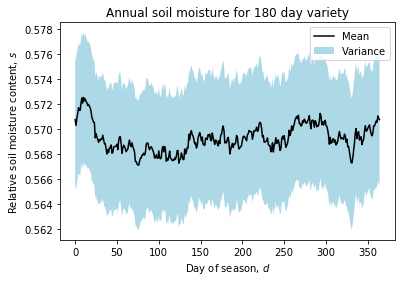

In [49]:
# This is for one climatology and one maize variety (180 days)
plt.plot(df['mean'], 'k-')
x = np.arange(0, 365, 1) #np.arange(90, 135, 1)

plt.fill_between(x, df['var']+df['mean'], df['mean']-df['var'],facecolor='lightblue') #, facecolor='lightblue'
plt.title('Annual soil moisture for 180 day variety')
plt.ylabel('Relative soil moisture content, $\mathit{s}$')
plt.xlabel('Day of season, $\mathit{d}$')
plt.legend(['Mean', 'Variance'])
#plt.ylim(0.52, 0.62)

In [4]:
# Average soil moisture during interval of the season
# What this is doing is basically the same as my code before and just returning 
# the average soil moisture values during the "growing" part of the season. 

def avg_sm_gseason(simulations, tstart = 0.5, tend = 0.75):
    result = []

    climate = Climate() 
    soil = Soil('loam')
    crop = Crop(soil=soil)
    soil.set_nZr(crop)  
    model = CropModel(crop=crop,soil=soil,climate=climate)

    model.run()
    fin = model.output()

    for i in range(simulations):
        # This part is not really necessary
        # Tseas is 180 which is just what the model is set to 
        # create variable for DOY
        tseas = 120
        range_tseas = list(range(1,181,1))

        #print(model.s)
        fin['doy'] = range_tseas
        len(fin.doy)

        # Select certain rows
        start = int(tseas*tstart)
        end = int(tseas*tend)
        x = fin.s[start:end]
      
        # Add this value to a list
        result.append(x)
        
    # Make it a float
    return np.array(result, dtype=np.float32)

test = avg_sm_gseason(1000)

test.mean(), test.var()

(0.568378, 0.001018277)

In [5]:
def dist_avg_sm_gseason_daily(simulations, tstart = 0.5, tend = 0.75):
    # generate little progress bar
    import time
    import progressbar
    
    for i in progressbar.progressbar(range(simulations)):
        time.sleep(0.02)
    
    df = pd.DataFrame()
    df2 = pd.DataFrame()
    result = []
    
    # run this many times
    for i in range(simulations):
        
        # initialize objects
        climate = Climate() 
        soil = Soil('loam')
        crop = Crop(soil=soil)
        soil.set_nZr(crop)  
        model = CropModel(crop=crop,soil=soil,climate=climate)
        model.run()
        fin = model.output()
        
        # Return just the soil moisture in a dataframe
        df['x_' + str(i)] = model.s
        
        # just select the part of the growing season that we want
        tseas = 180

        # Select certain rows
        start = int(tseas*tstart)
        end = int(tseas*tend)
        _df = df[start:end]
        
        # Take average soil moisture across each day
        df2['mean'] = _df.mean(axis=1)
        df2['var'] = _df.var(axis=1)

    return _df, df2 #result

df, df2 = dist_avg_sm_gseason_daily(100)

100% (100 of 100) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


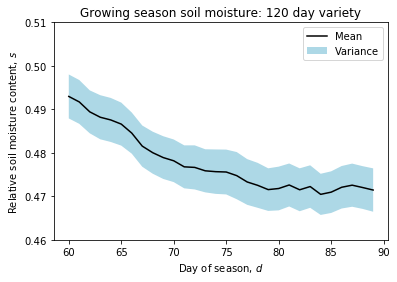

In [5]:
# Plot some stuff
# This is for one climatology and one maize variety (180 days)
plt.plot(df2['mean'], 'k-')
x = np.arange(60, 90, 1) #np.arange(90, 135, 1)

plt.fill_between(x, df2['var']+df2['mean'], df2['mean']-df2['var'],facecolor='lightblue') #, facecolor='lightblue'
plt.title('Growing season soil moisture: 120 day variety')
plt.ylabel('Relative soil moisture content, $\mathit{s}$')
plt.xlabel('Day of season, $\mathit{d}$')
plt.legend(['Mean', 'Variance'])
plt.ylim(0.46, 0.51)

# I'm not sure that this is correct but it's somethingt

plt.savefig('../output/figures/AvgGseasSM_120d.pdf', format='pdf')

# Save the data as a csv
df2.to_csv('../output/dataframes/AvgGseasSM_120d.csv', sep=',')
# 

In [18]:
def daily_sm(simulations):
    
    # generate little progress bar
    import time
    import progressbar
    
    for i in progressbar.progressbar(range(simulations)):
        time.sleep(0.02)
    
    df = pd.DataFrame()
    result = []
    
    # run this many times
    for i in range(simulations):
        
        # initialize objects
        climate = Climate() 
        soil = Soil('loam')
        crop = Crop(soil=soil)
        soil.set_nZr(crop)  
        model = CropModel(crop=crop,soil=soil,climate=climate)
        model.run()

        # Return just the soil moisture in a dataframe
        df['x_' + str(i)] = model.s
        
        # Take average soil moisture across each day
        df['mean'] = df.mean(axis=1)
        df['var'] = df.var(axis=1)

    return df #result

fin = daily_sm(10)

100% (10 of 10) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


In [21]:
fin

,x_0,mean,var,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9
0,0.300000,0.273180,0.007063,0.300000,0.300000,0.300000,0.300000,0.300000,0.300000,0.300000,0.300000,0.300000
1,0.299561,0.282296,0.008003,0.312321,0.299561,0.299561,0.299561,0.309361,0.379615,0.299561,0.299561,0.299561
2,0.299126,0.287452,0.008306,0.311740,0.299126,0.316509,0.299126,0.308815,0.377203,0.299126,0.344546,0.299126
3,0.298696,0.286763,0.008247,0.311165,0.298696,0.315877,0.298696,0.308275,0.374873,0.298696,0.343286,0.298696
4,0.298271,0.298894,0.009743,0.321498,0.425167,0.315252,0.298271,0.307742,0.372622,0.298271,0.342065,0.298271
5,0.297850,0.299446,0.009666,0.320802,0.421151,0.314634,0.297850,0.324155,0.370446,0.297850,0.340883,0.297850
6,0.297434,0.301117,0.009772,0.322886,0.423837,0.333557,0.297434,0.323425,0.368343,0.297434,0.339738,0.297434
7,0.297023,0.310257,0.010717,0.326755,0.427466,0.332640,0.297023,0.322704,0.366310,0.297023,0.338629,0.405391
8,0.334962,0.312513,0.010578,0.325991,0.423366,0.331752,0.296615,0.321993,0.364345,0.296615,0.337555,0.402086
9,0.344296,0.319295,0.011025,0.377039,0.419415,0.330891,0.296213,0.321291,0.387442,0.296213,0.336514,0.398897


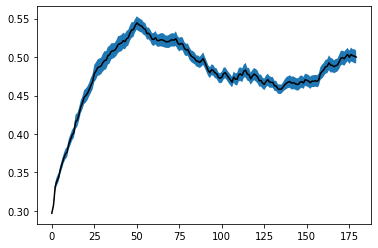

In [23]:
plt.plot(fin['mean'], 'k-')
x = np.arange(0.0, 180, 1)

plt.fill_between(x, fin['var']+fin['mean'], fin['mean']-fin['var'])
                 #v facecolor='red'
# I'm not sure that this is correct but it's somethingt

In [ ]:
def average_soil_moisture(simulations):
    
    # generate little progress bar
    import time
    import progressbar
    
    for i in progressbar.progressbar(range(simulations)):
        time.sleep(0.02)
    
    result = []
    
    # run this many times
    for i in range(simulations):
        
        # initialize objects
        climate = Climate() 
        soil = Soil('loam')
        crop = Crop(soil=soil)
        soil.set_nZr(crop)  
        model = CropModel(crop=crop,soil=soil,climate=climate)

        model.run()
        model.output()

        # Return average soil moisture
        x = model.s.mean()

        # Add this value to a list
        result.append(x)
        
    return result

# TODO: One enhancement
# Suppress done!

In [ ]:
fin = average_soil_moisture(simulations=1000)

In [ ]:
# This is the average and variance of soil moisture for the 10000s of simulations
import statistics
statistics.mean(fin)